<a href="https://colab.research.google.com/github/FairuzFernanda30/Latihan/blob/main/TugasNLP_FairuzFernanda_Persevere24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama : Fairuz Fernanda Hermawan
## Kelas : Persevere

Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

Tugas Anda:

-Tentukan langkah pre-processing yang tepat untuk dataset di atas.
Gunakan range n_gram yang berbeda. Amati apa perbedaannya.

-Menurut Anda, apakah term yang dihasilkan (X_kbest_features) pada feature 
 selection sudah memiliki informasi yang relevan?

-Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam melakukan pre-processing dan feature engineering.

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa

# Setup

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [7]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 5.8 MB/s 


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Data Aquisition

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
path = 'drive/My Drive/Colab Notebooks'

In [18]:
df = pd.read_csv (path+'/Datasets.csv')
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [20]:
df = df[['reviewContent', 'likeCount']]

In [21]:
df.head()

,reviewContent,likeCount
0,bagus mantap dah sesui pesanan,0
1,"Bagus, sesuai foto",0
2,okkkkk mantaaaaaaapppp ... goood,0
3,bagus sesuai,0
4,NaN,0


In [23]:
df.isnull().sum()

reviewContent    96758
likeCount            0
dtype: int64

In [26]:
x = 96758/203787*100
print ('perbandingan data kosong dengan keseluruhan data :',round(x,3),'%')

perbandingan data kosong dengan keseluruhan data : 47.48 %


In [27]:
df = df.dropna()

In [28]:
df.isnull().sum()

reviewContent    0
likeCount        0
dtype: int64

In [42]:
print('Total Jumlah Review:', df.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [1] likeCount 1\t:', df[df.likeCount == 1].shape[0], 'data')
print('-- [2] likeCount 2\t:', df[df.likeCount == 2].shape[0], 'data')
print('-- [3] likeCount 3\t:', df[df.likeCount == 3].shape[0], 'data')
print('-- [4] likeCount 4\t:', df[df.likeCount == 4].shape[0], 'data')
print('-- [5] likeCount 5\t:', df[df.likeCount == 5].shape[0], 'data\n')

Total Jumlah Review: 107029 data

terdiri dari (label):
-- [1] likeCount 1	: 8837 data
-- [2] likeCount 2	: 2664 data
-- [3] likeCount 3	: 1168 data
-- [4] likeCount 4	: 723 data
-- [5] likeCount 5	: 578 data



ValueError: ignored

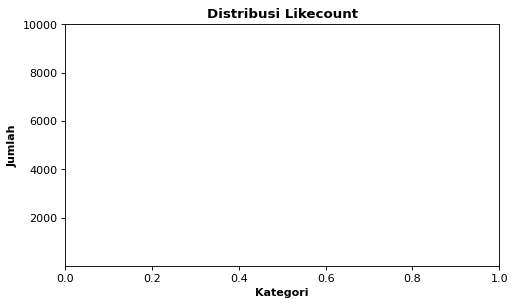

In [43]:
height = df['likeCount'].value_counts()
labels = ('5', '4', '3', '2', '1') 
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,10000) #batas Nilai Distribusi yang ditampilkan pada gambar
plt.title('Distribusi Likecount', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

#Text Preprocessing

## Case folding

In [44]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [45]:
raw_sample = df['reviewContent'].iloc[0]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  bagus  mantap dah sesui pesanan
Case folding	:  bagus  mantap dah sesui pesanan


#Word Normalization

In [46]:
# Mengunduh Corpus Singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-03-29 16:01:31--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.01s   

2022-03-29 16:01:31 (6.18 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [47]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

#Filtering(stopword Removal)

In [48]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [49]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['tsel', 'gb', 'rb']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [50]:
raw_sample = df['reviewContent'].iloc[0]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  bagus  mantap dah sesui pesanan
Case folding		:  bagus  mantap dah sesui pesanan
Stopword removal	:  bagus mantap dah sesui pesanan


#Stemming

In [51]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [52]:
raw_sample = df['reviewContent'].iloc[8]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Apakah TV. Tsb. Suda ada anti gores..
Case folding		:  apakah tv tsb suda ada anti gores
Stopword removal	:  tv tsb suda anti gores
Stemming		:  tv tsb suda anti gores


#Text Preprocessing Pipeline

In [53]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [54]:
%%time
df['clean_review'] = df['reviewContent'].apply(text_preprocessing_process)

CPU times: user 1h 19min 40s, sys: 30.1 s, total: 1h 20min 10s
Wall time: 1h 19min 46s


In [55]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
df.to_csv('clean_data.csv')

In [56]:
df

,reviewContent,likeCount,clean_review
0,bagus mantap dah sesui pesanan,0,bagus mantap sesui pesan
1,"Bagus, sesuai foto",0,bagus sesuai foto
2,okkkkk mantaaaaaaapppp ... goood,0,okkkkk mantaaaaaaapppp goood
3,bagus sesuai,0,bagus sesuai
7,bima,4,bima
...,...,...,...
203780,Wkwkwk,0,wkwkwk
203781,seller incapable to keep his product page clea...,0,jual incapable keep his produk page clear the ...
203782,barang bagus dengan harga kompetitif,6,barang bagus harga kompetitif
203785,Ok.thank lazada Pagi order sore barang nyampe ...,0,okthank lazada pagi order sore barang packing ...


In [60]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
df.to_csv('clean_df.csv')

#Feature Engineering

In [106]:
path = 'drive/My Drive/Colab Notebooks'

In [107]:
data = pd.read_csv(path+'/clean_data.csv')
df.head()

,reviewContent,likeCount,clean_review
0,bagus mantap dah sesui pesanan,0,bagus mantap sesui pesan
1,"Bagus, sesuai foto",0,bagus sesuai foto
2,okkkkk mantaaaaaaapppp ... goood,0,okkkkk mantaaaaaaapppp goood
3,bagus sesuai,0,bagus sesuai
7,bima,4,bima


In [108]:
data.isnull().sum()

Unnamed: 0         0
reviewContent      0
likeCount          0
clean_review     588
dtype: int64

In [109]:
data = df.dropna()

In [110]:
#mengambil 4500 data
data = df[:4500]

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 9164
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewContent  4500 non-null   object
 1   likeCount      4500 non-null   int64 
 2   clean_review   4500 non-null   object
dtypes: int64(1), object(2)
memory usage: 140.6+ KB


In [112]:
# Pisahkan kolom feature dan target
X = data['clean_review']
y = data['likeCount']

#Feature Extraction (bag of word & N-gram)

mengubah teks menjadi vektor dengan metode BoW

In [113]:
'''
Convert a collection of text documents to a matrix of token counts.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Unigram
vec = CountVectorizer(ngram_range=(2,3))
vec.fit(X)

CountVectorizer(ngram_range=(2, 3))

In [114]:
# Melihat Jumlah Fitur
print(len(vec.get_feature_names_out()))

34622


In [115]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(vec.get_feature_names_out())

['ababila hanphone' 'ababila hanphone dlamnga' 'abal abal' ...
 'zipper nya rapih' 'zippernya kecewa' 'zippernya kecewa susah']


In [116]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_unigram = vec.transform(X).toarray()

X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [117]:
data_unigram = pd.DataFrame(X_unigram, columns=vec.get_feature_names_out())
data_unigram

,ababila hanphone,ababila hanphone dlamnga,abal abal,abal abal lagibaguslahmksh,abal file,abal file simpan,abal lagibaguslahmksh,abal lagibaguslahmksh lazadaseller,abal lazada,abal lazada kurang,...,yya dgambar,yya dgambar thank,zeb pesan,zeb pesan kamis,zenfone bahan,zenfone bahan tebalsesuai,zipper nya,zipper nya rapih,zippernya kecewa,zippernya kecewa susah
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
with open('bow.pickle', 'wb') as output:
  pickle.dump(X_unigram, output)

#feature Extraction (TF-IDF & N-Gram)

In [119]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(2,4))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)

In [120]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

52505


In [121]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['ababila hanphone' 'ababila hanphone dlamnga' 'abal abal' ...
 'zippernya kecewa' 'zippernya kecewa susah' 'zippernya kecewa susah buka']


In [122]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()

X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,ababila hanphone,ababila hanphone dlamnga,abal abal,abal abal lagibaguslahmksh,abal abal lagibaguslahmksh lazadaseller,abal file,abal file simpan,abal file simpan trbaca,abal lagibaguslahmksh,abal lagibaguslahmksh lazadaseller,...,zeb pesan kamis jumat,zenfone bahan,zenfone bahan tebalsesuai,zenfone bahan tebalsesuai estimasi,zipper nya,zipper nya rapih,zipper nya rapih pokok,zippernya kecewa,zippernya kecewa susah,zippernya kecewa susah buka
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
with open('tf_idf.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

#Feature Selection

In [91]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [92]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 34622
Reduced feature number: 1000


In [94]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.063205
1,0.063205
2,0.052053
3,0.052053
4,4.206020
...,...
34617,0.050023
34618,0.046836
34619,0.046836
34620,0.077727


In [95]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.063205,ababila hanphone
1,0.063205,ababila hanphone dlamnga
2,0.052053,abal abal
3,0.052053,abal abal lagibaguslahmksh
4,4.206020,abal file
...,...,...
34617,0.050023,zenfone bahan tebalsesuai
34618,0.046836,zipper nya
34619,0.046836,zipper nya rapih
34620,0.077727,zippernya kecewa


In [96]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
12159,4499.000000,hardist bukn
17708,2978.219301,laptop nya bagus
17849,2637.743780,layar sentuh yah
28575,2637.743780,sentuh yah
27992,2597.498861,sayadi batal
...,...,...
4538,0.016430,bayar metode kirim
18510,0.016430,lsg bayar
18511,0.016430,lsg bayar metode
9891,0.016430,express sdgkan


In [97]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [98]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
len(selected_feature)

1000

In [99]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,activationnyacode nyaa,activationnyacode nyaa invalid,adek main,adek main gta,air gold,air gold inch,aktifikasi kode,aktifikasi kode ekspired,aktivasi oleh,aktivasi oleh situs,...,windows nya,windows nya chinese,windows versi,windows versi bahasa,windows versi inggris,windowsnya asli,windowsnya asli yah,ya jual barang,yah bantu,yah bantu installkan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
with open('best_feature.pickle', 'wb') as output:
  pickle.dump(X_kbest_features, output)

#Resume

-Tentukan langkah pre-processing yang tepat untuk dataset di atas. Gunakan range n_gram yang berbeda. Amati apa perbedaannya.

-Menurut Anda, apakah term yang dihasilkan (X_kbest_features) pada feature selection sudah memiliki informasi yang relevan?

-Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam melakukan pre-processing dan feature engineering.

Pada langkah pre-processing saya mengikuti langkah yang sudah diberikan oleh coach dan tidak ada masalah.

kemudian,saya menggunakan n_gram dengan komposisi (2,3),saya mendapati fitur yang dikeluarkan setelah di cek terdapat 34622 nama fitur yang keluar dan pada saat menampilkan fitur beserta nilainya terdapat dua kalimat yang keluar seperti "ababila hanphone" ketimbang contoh kemarin yang hanya 1 kalimat saja.

perlu digaris bawahi untuk jika saya mengubah n-gram lagi maka akan bertambah atau berkurang sesuai dengan pengubahan di nilai nya.

menurut saya term yang dihasilkan (X_kbest_features) belum memiliki informasi yang relevan karena banyak yang nilainya 0.0 ketika ditampilkan pada tabel

dan beberapa hal yang mengganggu saya ketika menggunakan bag of word dan tf-idf adalah masih banyak kesalahan penulisan pada fitur per kata katanya.